# Load Decryption Key

In [1]:
import io
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from helpers import decrypt_message
import yaml


# Load the YAML file
with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)

# Access and encode the encryption key to bytes
FERNET_KEY = config["encryption"]["key"].encode()


b'AeEezCBvjvadGYhXBpcTB7m5lgvuSt2qZRDoayLeCcw='


# Connect to DB and access user data

In [27]:
def display_user_images(username: str):
    images = []
    # Define the path to the database
    db_path = "user/users.db"

    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)

    # Load the user table into a pandas DataFrame
    USERS = pd.read_sql_query("SELECT * FROM user", conn)

    # print a list of all the users
    print(f"Registered Users: {list(USERS['username'])}")


    # Close the database connection
    conn.close()

    # Filter the DataFrame for the specific user
    user_data = USERS[USERS["username"] == username]

    if user_data.empty:
        print("User not found.")
        return

    for n in [1, 2, 3]:
        image_column = f"image_{n}"
        if (
            image_column in user_data.columns
            and user_data.iloc[0][image_column] is not None
        ):
            # Decrypt the image data
            encrypted_image = user_data.iloc[0][image_column]
            decrypted_image = decrypt_message(encrypted_image, FERNET_KEY)

            # Convert decrypted data to an image
            image_bytes = io.BytesIO(decrypted_image)
            image = Image.open(image_bytes)

            # # Display the image
            # plt.imshow(image)
            # plt.axis("off")
            # plt.title(f"{username}: Image {n}")
            # plt.show()

            images.append(image)

        else:
            print(f"Image {n} not found.")
    
    return images

In [28]:
images = display_user_images("alice")

Registered Users: ['armaan', 'bob', 'alice']


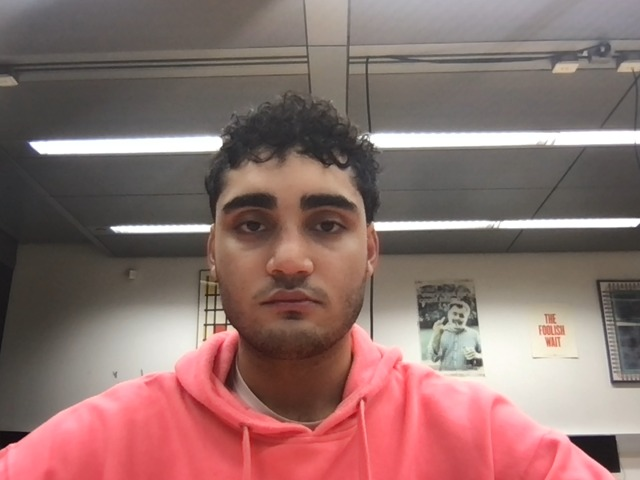

In [31]:
images[0]